In [1]:
# Team Jupiter

## A look at what affects a movies success?
    ### Success to be defined as both highest rated or most profitable.

---

In [2]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import glob
import os

---

In [3]:
# read in movie list and ratings files

ratings_df = pd.read_csv("../Data/ratings.csv")
movies_df = pd.read_csv("../Data/movies.csv")

In [4]:
# read in movie budgets, top 500 movies and best films since 1950 csv files

budgets_df = pd.read_csv("../Data/Most Profitable Movies of All Time - Inflation Adjusted.csv")
top500movies_df = pd.read_csv("../Data/Most Profitable Movies of All Time - Top 500 Movies (pink = added by us).csv")
yearbestmovie_df = pd.read_csv("../Data/Best_Films_Every_Year_Since_1950.csv")

---

In [5]:
# Start DataWrangling

In [6]:
## drop columns that wont be used for wrangling
## start with rating_df

In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
ratings_df1 = ratings_df.drop(['timestamp'], axis=1)

In [9]:
## drop rows with null values if any
ratings_df1 = ratings_df1.dropna()

In [10]:
ratings_df1.info() 
## no values were dropped, no nulls!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [11]:
## all the columns in movies_df seem usefull
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movieId   9742 non-null   int64 
 1   title     9742 non-null   object
 2   genres    9742 non-null   object
 3   genres.1  6891 non-null   object
 4   genres.2  3673 non-null   object
 5   genres.3  1335 non-null   object
 6   genres.4  348 non-null    object
 7   genres.5  77 non-null     object
 8   genres.6  14 non-null     object
 9   genres.7  2 non-null      object
 10  genres.8  1 non-null      object
 11  genres.9  1 non-null      object
dtypes: int64(1), object(11)
memory usage: 913.4+ KB


In [12]:
## pull up column info for yearbestmovie_df
yearbestmovie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        70 non-null     int64  
 1   Const           70 non-null     object 
 2   Created         70 non-null     object 
 3   Modified        70 non-null     object 
 4   Description     0 non-null      float64
 5   Title           70 non-null     object 
 6   URL             70 non-null     object 
 7   Title Type      70 non-null     object 
 8   IMDb Rating     70 non-null     float64
 9   Runtime (mins)  70 non-null     int64  
 10  Year            70 non-null     int64  
 11  Genres          70 non-null     object 
 12  Num Votes       70 non-null     int64  
 13  Release Date    70 non-null     object 
 14  Directors       70 non-null     object 
dtypes: float64(2), int64(4), object(9)
memory usage: 8.3+ KB


In [13]:
## drop columns [0,1,2,3,4,6,7] from Best_Films_Every_Year_Since_1950.csv

yearbestmovie_df1 = yearbestmovie_df.drop(yearbestmovie_df.columns[[0,1,2,3,4,6,7]],axis = 1)
yearbestmovie_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           70 non-null     object 
 1   IMDb Rating     70 non-null     float64
 2   Runtime (mins)  70 non-null     int64  
 3   Year            70 non-null     int64  
 4   Genres          70 non-null     object 
 5   Num Votes       70 non-null     int64  
 6   Release Date    70 non-null     object 
 7   Directors       70 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.5+ KB


In [14]:
## pull up column info for budgets_df
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          476 non-null    object 
 1   unadjusted gross ($m)          476 non-null    int64  
 2   inflation adjusted gross ($m)  476 non-null    object 
 3   % budget recovered             476 non-null    object 
 4   x times budget recovered       476 non-null    float64
 5   budget  (m)                    476 non-null    float64
 6   domestic gross (m)             476 non-null    int64  
 7   domestic %                     476 non-null    object 
 8   international gross (m)        476 non-null    object 
 9   % of gross from international  476 non-null    object 
 10  worldwide gross                476 non-null    object 
 11  year                           476 non-null    int64  
 12  decade                         476 non-null    obj

In [15]:
## drop columns [13, 14, 15] from Most Profitable Movies of All Time - Inflation Adjusted.csv

budgets_df1 = budgets_df.drop(budgets_df.columns[[13, 14, 15]],axis = 1)
budgets_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          476 non-null    object 
 1   unadjusted gross ($m)          476 non-null    int64  
 2   inflation adjusted gross ($m)  476 non-null    object 
 3   % budget recovered             476 non-null    object 
 4   x times budget recovered       476 non-null    float64
 5   budget  (m)                    476 non-null    float64
 6   domestic gross (m)             476 non-null    int64  
 7   domestic %                     476 non-null    object 
 8   international gross (m)        476 non-null    object 
 9   % of gross from international  476 non-null    object 
 10  worldwide gross                476 non-null    object 
 11  year                           476 non-null    int64  
 12  decade                         476 non-null    obj

In [16]:
## pull up column info for top500movies_df
top500movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          558 non-null    object 
 1   worldwide gross (m)            558 non-null    float64
 2   % budget recovered             558 non-null    object 
 3   X times budget recovered       558 non-null    float64
 4   budget  (millions)             558 non-null    float64
 5   domestic gross (m)             558 non-null    float64
 6   domestic %                     558 non-null    object 
 7   international gross (m)        558 non-null    object 
 8   % of gross from international  558 non-null    object 
 9   worldwide gross                558 non-null    object 
 10  year                           558 non-null    int64  
 11  decade                         558 non-null    object 
 12  source                         477 non-null    obj

In [17]:
## drop columns [12, 13, 14, 15] from Most Profitable Movies of All Time - Top 500 Movies (pink = added by us).csv

top500movies_df1 = top500movies_df.drop(top500movies_df.columns[[12, 13, 14, 15]],axis = 1)
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          558 non-null    object 
 1   worldwide gross (m)            558 non-null    float64
 2   % budget recovered             558 non-null    object 
 3   X times budget recovered       558 non-null    float64
 4   budget  (millions)             558 non-null    float64
 5   domestic gross (m)             558 non-null    float64
 6   domestic %                     558 non-null    object 
 7   international gross (m)        558 non-null    object 
 8   % of gross from international  558 non-null    object 
 9   worldwide gross                558 non-null    object 
 10  year                           558 non-null    int64  
 11  decade                         558 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 5

---

In [18]:
## after dropping columns that aren't needed and nulls its time to merge and transform data types if needed

In [19]:
## merge movies and ratings df's to list the movie name and genres for each user rating in the ratings df
## rating range from 0-5

movie_ratings_df = pd.merge(ratings_df1, movies_df)
movie_ratings_df

,userId,movieId,rating,title,genres,genres.1,genres.2,genres.3,genres.4,genres.5,genres.6,genres.7,genres.8,genres.9
0,1,1,4.0,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
1,5,1,4.0,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
2,7,1,4.5,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
3,15,1,2.5,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
4,17,1,4.5,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action,Crime,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100833,610,160836,3.0,Hazard (2005),Action,Drama,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100834,610,163937,3.5,Blair Witch (2016),Horror,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(movie_ratings_df)

        userId  movieId  rating                             title     genres  \
0            1        1     4.0                  Toy Story (1995)  Adventure   
1            5        1     4.0                  Toy Story (1995)  Adventure   
2            7        1     4.5                  Toy Story (1995)  Adventure   
3           15        1     2.5                  Toy Story (1995)  Adventure   
4           17        1     4.5                  Toy Story (1995)  Adventure   
...        ...      ...     ...                               ...        ...   
100831     610   160341     2.5                  Bloodmoon (1997)     Action   
100832     610   160527     4.5  Sympathy for the Underdog (1971)     Action   
100833     610   160836     3.0                     Hazard (2005)     Action   
100834     610   163937     3.5                Blair Witch (2016)     Horror   
100835     610   163981     3.5                         31 (2016)     Horror   

         genres.1  genres.2 genres.3 ge

In [21]:
list(movie_ratings_df)

['userId',
 'movieId',
 'rating',
 'title',
 'genres',
 'genres.1',
 'genres.2',
 'genres.3',
 'genres.4',
 'genres.5',
 'genres.6',
 'genres.7',
 'genres.8',
 'genres.9']

---

In [22]:
## merge together the top500movies_df1 & budgets_df2 to combine all the movie budget and sales data into one df

In [23]:
budgets_df2 = budgets_df1.reindex(sorted(budgets_df1.columns), axis=1)
budgets_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   % budget recovered             476 non-null    object 
 1   % of gross from international  476 non-null    object 
 2   budget  (m)                    476 non-null    float64
 3   decade                         476 non-null    object 
 4   domestic %                     476 non-null    object 
 5   domestic gross (m)             476 non-null    int64  
 6   inflation adjusted gross ($m)  476 non-null    object 
 7   international gross (m)        476 non-null    object 
 8   title                          476 non-null    object 
 9   unadjusted gross ($m)          476 non-null    int64  
 10  worldwide gross                476 non-null    object 
 11  x times budget recovered       476 non-null    float64
 12  year                           476 non-null    int

In [24]:
## rename columns to similar formats
budgets_df2.rename(columns={'domestic %': '% of gross from domestic', 
                            'inflation adjusted gross ($m)': 'inflation adjusted gross (m)', 
                            'unadjusted gross ($m)': 'unadjusted gross (m)'}, inplace=True)

In [25]:
## sort columns for readability 
inflation_df = budgets_df2.reindex(sorted(budgets_df2.columns), axis=1)
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   % budget recovered             476 non-null    object 
 1   % of gross from domestic       476 non-null    object 
 2   % of gross from international  476 non-null    object 
 3   budget  (m)                    476 non-null    float64
 4   decade                         476 non-null    object 
 5   domestic gross (m)             476 non-null    int64  
 6   inflation adjusted gross (m)   476 non-null    object 
 7   international gross (m)        476 non-null    object 
 8   title                          476 non-null    object 
 9   unadjusted gross (m)           476 non-null    int64  
 10  worldwide gross                476 non-null    object 
 11  x times budget recovered       476 non-null    float64
 12  year                           476 non-null    int

In [26]:
## sort columns for readability 
top500movies_df1 = top500movies_df1.reindex(sorted(top500movies_df1.columns), axis=1)
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   % budget recovered             558 non-null    object 
 1   % of gross from international  558 non-null    object 
 2   X times budget recovered       558 non-null    float64
 3   budget  (millions)             558 non-null    float64
 4   decade                         558 non-null    object 
 5   domestic %                     558 non-null    object 
 6   domestic gross (m)             558 non-null    float64
 7   international gross (m)        558 non-null    object 
 8   title                          558 non-null    object 
 9   worldwide gross                558 non-null    object 
 10  worldwide gross (m)            558 non-null    float64
 11  year                           558 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 5

In [27]:
# rename related columns to similar formats
top500movies_df1.rename(columns={'X times budget recovered': 'x times budget recovered', 
                                 'budget  (millions)': 'budget (m)',
                                 'domestic %': '% of gross from domestic',
                                 'title ': 'title'}, inplace=True)

In [28]:
## sort columns for readability 
top500movies_df1 = top500movies_df1.reindex(sorted(top500movies_df1.columns), axis=1)
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   % budget recovered             558 non-null    object 
 1   % of gross from domestic       558 non-null    object 
 2   % of gross from international  558 non-null    object 
 3   budget (m)                     558 non-null    float64
 4   decade                         558 non-null    object 
 5   domestic gross (m)             558 non-null    float64
 6   international gross (m)        558 non-null    object 
 7   title                          558 non-null    object 
 8   worldwide gross                558 non-null    object 
 9   worldwide gross (m)            558 non-null    float64
 10  x times budget recovered       558 non-null    float64
 11  year                           558 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 5

In [29]:
inflation_df.head()

,% budget recovered,% of gross from domestic,% of gross from international,budget (m),decade,domestic gross (m),inflation adjusted gross (m),international gross (m),title,unadjusted gross (m),worldwide gross,x times budget recovered,year
0,702%,46.20%,53.80%,65.0,2000's,211,671,245,300,456,"456,082,343",7.0,2007
1,427%,41.40%,58.60%,90.0,2010's,159,455,225,1917,385,"384,576,334",4.3,2019
2,396%,21.00%,79.00%,200.0,2000's,166,"1,116",625,2012,791,"791,217,826",4.0,2009
3,479%,42.50%,57.50%,67.0,1990's,136,618,185,101 Dalmatians,321,"320,689,294",4.8,1996
4,663%,57.90%,42.10%,50.0,2010's,192,422,140,22 Jump Street,331,"331,333,876",6.6,2014


In [30]:
top500movies_df1.head()

,% budget recovered,% of gross from domestic,% of gross from international,budget (m),decade,domestic gross (m),international gross (m),title,worldwide gross,worldwide gross (m),x times budget recovered,year
0,702%,46.2%,53.8%,65.0,2000's,211.0,245,300,"456,082,343",456.0,7.0,2007
1,427%,41.4%,58.6%,90.0,2010's,159.0,225,1917,"384,576,334",385.0,4.3,2019
2,396%,21.0%,79.0%,200.0,2000's,166.0,625,2012,"791,217,826",791.0,4.0,2009
3,479%,42.5%,57.5%,67.0,1990's,136.0,185,101 Dalmatians,"320,689,294",321.0,4.8,1996
4,663%,57.9%,42.1%,50.0,2010's,192.0,140,22 Jump Street,"331,333,876",331.0,6.6,2014


In [31]:
# convert top500movies_df1[domestic gross (m)] column into int64
top500movies_df1['domestic gross (m)'] = top500movies_df1['domestic gross (m)'].astype(int)
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   % budget recovered             558 non-null    object 
 1   % of gross from domestic       558 non-null    object 
 2   % of gross from international  558 non-null    object 
 3   budget (m)                     558 non-null    float64
 4   decade                         558 non-null    object 
 5   domestic gross (m)             558 non-null    int32  
 6   international gross (m)        558 non-null    object 
 7   title                          558 non-null    object 
 8   worldwide gross                558 non-null    object 
 9   worldwide gross (m)            558 non-null    float64
 10  x times budget recovered       558 non-null    float64
 11  year                           558 non-null    int64  
dtypes: float64(3), int32(1), int64(1), object(7)
memor

In [32]:
# convert international gross (m) column into int64
#top500movies_df1['international gross (m)'] = pd.to_numeric(top500movies_df1['international gross (m)'])
#top500movies_df1.info()

## there appears to be a comma in one of the numbers(string), will remove before casting to nnumeric
top500movies_df1['international gross (m)'] = top500movies_df1['international gross (m)'].str.replace(r'\D', '').astype(int)

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_8004\3833004053.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  top500movies_df1['international gross (m)'] = top500movies_df1['international gross (m)'].str.replace(r'\D', '').astype(int)


In [33]:
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   % budget recovered             558 non-null    object 
 1   % of gross from domestic       558 non-null    object 
 2   % of gross from international  558 non-null    object 
 3   budget (m)                     558 non-null    float64
 4   decade                         558 non-null    object 
 5   domestic gross (m)             558 non-null    int32  
 6   international gross (m)        558 non-null    int32  
 7   title                          558 non-null    object 
 8   worldwide gross                558 non-null    object 
 9   worldwide gross (m)            558 non-null    float64
 10  x times budget recovered       558 non-null    float64
 11  year                           558 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(6)
memor

In [34]:
## combine the 2 datasets with budget profit information to keep the ones from the top500 that also have an inflation adj value
##  movie_budgets_df = top500df + inflation_df[inflation adjusted gross (m)]


### didnt work
### df = pd.merge(df,df2[['Key_Column','Target_Column']],on='Key_Column', how='left')

### movie_budgets_df = pd.merge(top500movies_df1, inflation_df[['title','inflation adjusted gross (m)']], left_on= top500movies_df1['title'], right_on= inflation_df[['title'], how='left')
### print (movie_budgets_df)
### movie_budgets_df = pd.merge(top500movies_df1,inflation_df[['title', 'inflation adjusted gross (m)']], on='title', how='left')

### movie_budgets_df = pd.merge(top500movies_df1, inflation_df, on ='title')

In [35]:
### i dont think i need to actually merge the two 
### they are almost exactly the same, Top500 has more moives but not inflation adjusted gross worldwide
### sample difference n = 557-475 = 82

# 🤦‍♂️

---

In [36]:
# Explore data, format columns if needed for stats testing

In [37]:
# look at the data frame that contains the budget and box office sales data, DOES NOT CONTAIN RATINGS or GENRES

In [38]:
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   % budget recovered             558 non-null    object 
 1   % of gross from domestic       558 non-null    object 
 2   % of gross from international  558 non-null    object 
 3   budget (m)                     558 non-null    float64
 4   decade                         558 non-null    object 
 5   domestic gross (m)             558 non-null    int32  
 6   international gross (m)        558 non-null    int32  
 7   title                          558 non-null    object 
 8   worldwide gross                558 non-null    object 
 9   worldwide gross (m)            558 non-null    float64
 10  x times budget recovered       558 non-null    float64
 11  year                           558 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(6)
memor

In [39]:
list(top500movies_df1)

['% budget recovered',
 '% of gross from domestic',
 '% of gross from international',
 'budget (m)',
 'decade',
 'domestic gross (m)',
 'international gross (m)',
 'title',
 'worldwide gross',
 'worldwide gross (m)',
 'x times budget recovered',
 'year']

In [40]:
top500movies_df1.head()

,% budget recovered,% of gross from domestic,% of gross from international,budget (m),decade,domestic gross (m),international gross (m),title,worldwide gross,worldwide gross (m),x times budget recovered,year
0,702%,46.2%,53.8%,65.0,2000's,211,245,300,"456,082,343",456.0,7.0,2007
1,427%,41.4%,58.6%,90.0,2010's,159,225,1917,"384,576,334",385.0,4.3,2019
2,396%,21.0%,79.0%,200.0,2000's,166,625,2012,"791,217,826",791.0,4.0,2009
3,479%,42.5%,57.5%,67.0,1990's,136,185,101 Dalmatians,"320,689,294",321.0,4.8,1996
4,663%,57.9%,42.1%,50.0,2010's,192,140,22 Jump Street,"331,333,876",331.0,6.6,2014


In [41]:
# look at min/max values for movies release year and budgets

In [42]:
top500movies_df1['year'].min()

1973

In [43]:
top500movies_df1['year'].max()

2022

In [44]:
top500movies_df1['budget (m)'].min()

0.015

In [45]:
top500movies_df1['budget (m)'].max()

379.0

In [46]:
# count of how many movies titles there are
top500movies_df1['title'].count()

558

In [47]:
# Look at the data frame that only contains movie ratings and genres, DOES NOT CONTAIN BUDGET INFO

In [48]:
list(movie_ratings_df)

['userId',
 'movieId',
 'rating',
 'title',
 'genres',
 'genres.1',
 'genres.2',
 'genres.3',
 'genres.4',
 'genres.5',
 'genres.6',
 'genres.7',
 'genres.8',
 'genres.9']

In [49]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userId    100836 non-null  int64  
 1   movieId   100836 non-null  int64  
 2   rating    100836 non-null  float64
 3   title     100836 non-null  object 
 4   genres    100836 non-null  object 
 5   genres.1  84422 non-null   object 
 6   genres.2  55860 non-null   object 
 7   genres.3  23971 non-null   object 
 8   genres.4  7270 non-null    object 
 9   genres.5  1751 non-null    object 
 10  genres.6  363 non-null     object 
 11  genres.7  3 non-null       object 
 12  genres.8  2 non-null       object 
 13  genres.9  2 non-null       object 
dtypes: float64(1), int64(2), object(11)
memory usage: 11.5+ MB


In [50]:
# look a how many unique movie titles there are
movie_ratings_df['title'].nunique()

9719

In [51]:
# # look a how many unique movie reviewers there are
movie_ratings_df['userId'].nunique()

610

In [52]:
# look at min/max values for movies ratings to determine the scale range
movie_ratings_df['rating'].min()

0.5

In [53]:
movie_ratings_df['rating'].max()

5.0

---

In [54]:
# look at the data that contains movies ratings (0-10), genres, runtime and release year, DOES NOT CONTAIN BUDGET INFO

In [55]:
yearbestmovie_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           70 non-null     object 
 1   IMDb Rating     70 non-null     float64
 2   Runtime (mins)  70 non-null     int64  
 3   Year            70 non-null     int64  
 4   Genres          70 non-null     object 
 5   Num Votes       70 non-null     int64  
 6   Release Date    70 non-null     object 
 7   Directors       70 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.5+ KB


In [56]:
list(yearbestmovie_df1)

['Title',
 'IMDb Rating',
 'Runtime (mins)',
 'Year',
 'Genres',
 'Num Votes',
 'Release Date',
 'Directors']

In [57]:
yearbestmovie_df1.head()

,Title,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,The Irishman,7.8,209,2019,"Biography, Crime, Drama",401227,2019-09-27,Martin Scorsese
1,Incredibles 2,7.6,118,2018,"Animation, Action, Adventure, Comedy, Family, ...",307380,2018-06-05,Brad Bird
2,Dunkirk,7.8,106,2017,"Action, Drama, History, Thriller, War",678522,2017-07-13,Christopher Nolan
3,La La Land,8.0,128,2016,"Comedy, Drama, Music, Musical, Romance",611601,2016-08-31,Damien Chazelle
4,Me and Earl and the Dying Girl,7.7,105,2015,"Comedy, Drama, Romance",134350,2015-01-25,Alfonso Gomez-Rejon


In [58]:
# look at min/max values for movies ratings to determine the scale range
yearbestmovie_df1['IMDb Rating'].min()

6.5

In [59]:
yearbestmovie_df1['IMDb Rating'].max()

9.2

In [60]:
# look at min/max values for movies release year
yearbestmovie_df1['Release Date'].min()

'1950-08-04'

In [61]:
yearbestmovie_df1['Release Date'].max()

'2019-09-27'

---

In [78]:
# merge the top500 df into the movie_ratings_df, so that all the movies that got rated also have the budget/sales info

ratingsBudget_df = pd.merge(movie_ratings_df, top500movies_df1, on='title', how='outer')
ratingsBudget_df.head()

,userId,movieId,rating,title,genres,genres.1,genres.2,genres.3,genres.4,genres.5,...,% of gross from domestic,% of gross from international,budget (m),decade,domestic gross (m),international gross (m),worldwide gross,worldwide gross (m),x times budget recovered,year
0,1.0,1.0,4.0,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,1.0,4.0,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,1.0,4.5,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.0,1.0,2.5,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0,1.0,4.5,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# list of column names to see if they all merged over and to get names of columns to drop
list(ratingsBudget_df)

['userId',
 'movieId',
 'rating',
 'title',
 'genres',
 'genres.1',
 'genres.2',
 'genres.3',
 'genres.4',
 'genres.5',
 'genres.6',
 'genres.7',
 'genres.8',
 'genres.9',
 '% budget recovered',
 '% of gross from domestic',
 '% of gross from international',
 'budget (m)',
 'decade',
 'domestic gross (m)',
 'international gross (m)',
 'worldwide gross',
 'worldwide gross (m)',
 'x times budget recovered',
 'year']

In [80]:
# drop extra columns, again...
ratingsBudget_df.drop(['userId', 'movieId'], axis=1, inplace=True)
ratingsBudget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101392 entries, 0 to 101391
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   rating                         100836 non-null  float64
 1   title                          101392 non-null  object 
 2   genres                         100836 non-null  object 
 3   genres.1                       84422 non-null   object 
 4   genres.2                       55860 non-null   object 
 5   genres.3                       23971 non-null   object 
 6   genres.4                       7270 non-null    object 
 7   genres.5                       1751 non-null    object 
 8   genres.6                       363 non-null     object 
 9   genres.7                       3 non-null       object 
 10  genres.8                       2 non-null       object 
 11  genres.9                       2 non-null       object 
 12  % budget recovered            

In [81]:
# drop ratings for movies without matching budget info, df.drop(rows if df([column=12])=null)

ratingsBudget_df = ratingsBudget_df[ratingsBudget_df['budget (m)'].notnull()]
ratingsBudget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 78928 to 101391
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rating                         15 non-null     float64
 1   title                          571 non-null    object 
 2   genres                         15 non-null     object 
 3   genres.1                       15 non-null     object 
 4   genres.2                       15 non-null     object 
 5   genres.3                       0 non-null      object 
 6   genres.4                       0 non-null      object 
 7   genres.5                       0 non-null      object 
 8   genres.6                       0 non-null      object 
 9   genres.7                       0 non-null      object 
 10  genres.8                       0 non-null      object 
 11  genres.9                       0 non-null      object 
 12  % budget recovered             571 non-null

In [82]:
ratingsBudget_df.head(5)

,rating,title,genres,genres.1,genres.2,genres.3,genres.4,genres.5,genres.6,genres.7,...,% of gross from domestic,% of gross from international,budget (m),decade,domestic gross (m),international gross (m),worldwide gross,worldwide gross (m),x times budget recovered,year
78928,2.0,The Jungle Book (2016),Adventure,Drama,Fantasy,NaN,NaN,NaN,NaN,NaN,...,37.7%,62.3%,177.0,2010's,364.0,603.0,"966,554,929",967.0,5.5,2016.0
78929,3.0,The Jungle Book (2016),Adventure,Drama,Fantasy,NaN,NaN,NaN,NaN,NaN,...,37.7%,62.3%,177.0,2010's,364.0,603.0,"966,554,929",967.0,5.5,2016.0
78930,3.5,The Jungle Book (2016),Adventure,Drama,Fantasy,NaN,NaN,NaN,NaN,NaN,...,37.7%,62.3%,177.0,2010's,364.0,603.0,"966,554,929",967.0,5.5,2016.0
78931,4.5,The Jungle Book (2016),Adventure,Drama,Fantasy,NaN,NaN,NaN,NaN,NaN,...,37.7%,62.3%,177.0,2010's,364.0,603.0,"966,554,929",967.0,5.5,2016.0
78932,3.5,The Jungle Book (2016),Adventure,Drama,Fantasy,NaN,NaN,NaN,NaN,NaN,...,37.7%,62.3%,177.0,2010's,364.0,603.0,"966,554,929",967.0,5.5,2016.0


In [83]:
# list of unique values from genres.3-9 columns to see if they are all nulls
ratingsBudget_df['genres.3'].unique()

array([nan], dtype=object)

In [84]:
ratingsBudget_df['genres.4'].nunique()

0

In [85]:
ratingsBudget_df['genres.5'].nunique()

0

In [86]:
ratingsBudget_df['genres.6'].nunique()

0

In [87]:
ratingsBudget_df['genres.7'].nunique()

0

In [88]:
ratingsBudget_df['genres.8'].nunique()

0

In [89]:
ratingsBudget_df['genres.9'].nunique()

0

In [90]:
# drop extra columns, again...
ratingsBudget_df = ratingsBudget_df.drop(ratingsBudget_df.columns[[5,6,7,8,9,10,11]], axis=1)
ratingsBudget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 78928 to 101391
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rating                         15 non-null     float64
 1   title                          571 non-null    object 
 2   genres                         15 non-null     object 
 3   genres.1                       15 non-null     object 
 4   genres.2                       15 non-null     object 
 5   % budget recovered             571 non-null    object 
 6   % of gross from domestic       571 non-null    object 
 7   % of gross from international  571 non-null    object 
 8   budget (m)                     571 non-null    float64
 9   decade                         571 non-null    object 
 10  domestic gross (m)             571 non-null    float64
 11  international gross (m)        571 non-null    float64
 12  worldwide gross                571 non-null

In [91]:
ratingsBudget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 78928 to 101391
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rating                         15 non-null     float64
 1   title                          571 non-null    object 
 2   genres                         15 non-null     object 
 3   genres.1                       15 non-null     object 
 4   genres.2                       15 non-null     object 
 5   % budget recovered             571 non-null    object 
 6   % of gross from domestic       571 non-null    object 
 7   % of gross from international  571 non-null    object 
 8   budget (m)                     571 non-null    float64
 9   decade                         571 non-null    object 
 10  domestic gross (m)             571 non-null    float64
 11  international gross (m)        571 non-null    float64
 12  worldwide gross                571 non-null

In [92]:
# all data has been merged together for analysis question #2 and if needed for #1

---

In [93]:
# Looking at my first question 
##    Does a movies budget influnce box office success (gross)?
##     IV - budget (m) is continuous, float64 '177.0'
##     DV -  worldwide gross (m) is continuous, float64 '967.0'

## This looks like its fits for a linear regression, lets test the assumptions to find out.

In [94]:
top500movies_df1.head(10)

,% budget recovered,% of gross from domestic,% of gross from international,budget (m),decade,domestic gross (m),international gross (m),title,worldwide gross,worldwide gross (m),x times budget recovered,year
0,702%,46.2%,53.8%,65.0,2000's,211,245,300,"456,082,343",456.0,7.0,2007
1,427%,41.4%,58.6%,90.0,2010's,159,225,1917,"384,576,334",385.0,4.3,2019
2,396%,21.0%,79.0%,200.0,2000's,166,625,2012,"791,217,826",791.0,4.0,2009
3,479%,42.5%,57.5%,67.0,1990's,136,185,101 Dalmatians,"320,689,294",321.0,4.8,1996
4,663%,57.9%,42.1%,50.0,2010's,192,140,22 Jump Street,"331,333,876",331.0,6.6,2014
5,307%,31.6%,68.4%,110.0,2010's,107,231,300: Rise of an Empire,"337,580,051",338.0,3.1,2014
6,546%,53.9%,46.1%,58.0,2000's,171,146,A Beautiful Mind,"316,791,257",317.0,5.5,2001
7,303%,44.8%,55.2%,120.0,1990's,163,200,A Bug's Life,"363,258,859",363.0,3.0,1998
8,163%,42.4%,57.6%,200.0,2000's,138,187,A Christmas Carol,"325,286,646",325.0,1.6,2009
9,2406%,66.6%,33.4%,2.5,2010's,40,201,A Haunted House,"60,141,683",60.0,24.1,2013


In [95]:
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   % budget recovered             558 non-null    object 
 1   % of gross from domestic       558 non-null    object 
 2   % of gross from international  558 non-null    object 
 3   budget (m)                     558 non-null    float64
 4   decade                         558 non-null    object 
 5   domestic gross (m)             558 non-null    int32  
 6   international gross (m)        558 non-null    int32  
 7   title                          558 non-null    object 
 8   worldwide gross                558 non-null    object 
 9   worldwide gross (m)            558 non-null    float64
 10  x times budget recovered       558 non-null    float64
 11  year                           558 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(6)
memor

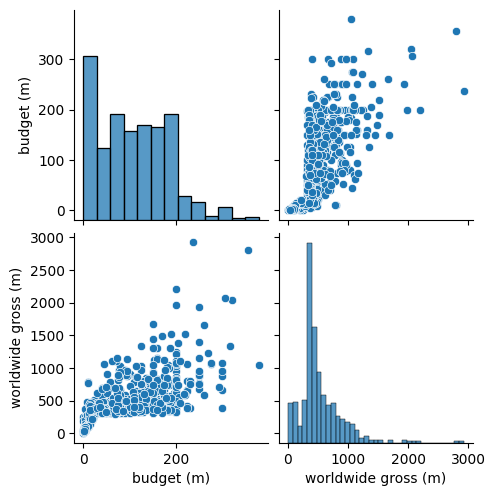

In [96]:
## create a scatter plot to test for linearity and normality
top500movies_LR = top500movies_df1[['budget (m)', 'worldwide gross (m)']].copy()
sns.pairplot(top500movies_LR)

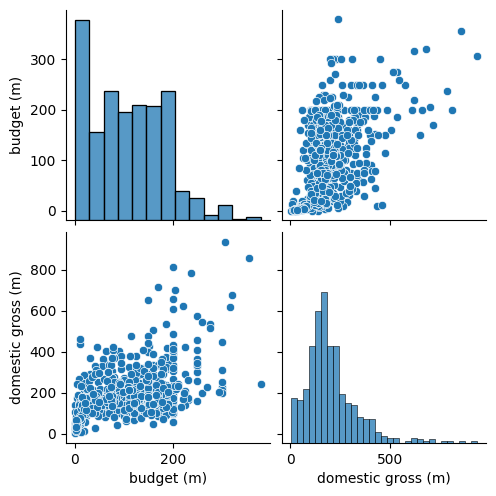

In [97]:
## does not appear to be normally distributed, look at domestic gross instead of worldwide

top500movies_LR1 = top500movies_df1[['budget (m)', 'domestic gross (m)']].copy()
sns.pairplot(top500movies_LR1)

In [98]:
## budget still seems a little skewed but the scatter plot does appear to become slighlty more linear

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_8004\2692129405.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(top500movies_LR1['budget (m)'])


<AxesSubplot: xlabel='budget (m)', ylabel='Density'>

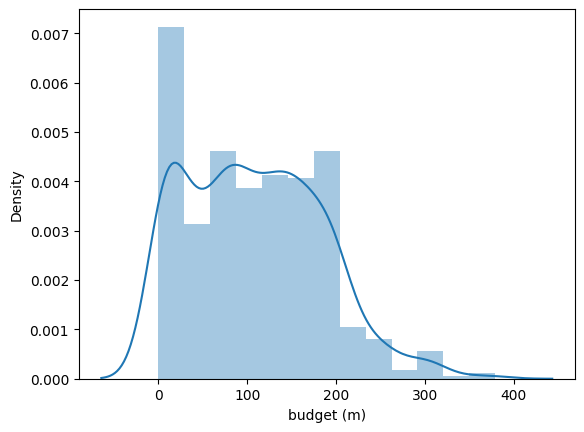

In [99]:
sns.distplot(top500movies_LR1['budget (m)'])

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_8004\2314184021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(top500movies_LR1['domestic gross (m)'])


<AxesSubplot: xlabel='domestic gross (m)', ylabel='Density'>

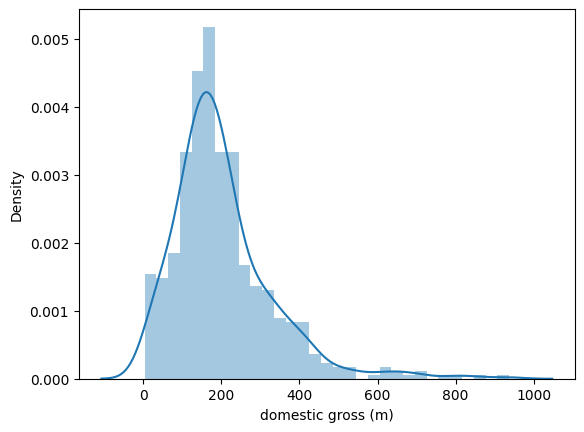

In [100]:
sns.distplot(top500movies_LR1['domestic gross (m)'])

In [101]:
## both distribution plots look rougly more even, is skewed slightly positive

In [102]:
## next test for Homoscedasticity

x = top500movies_LR1['budget (m)']
y = top500movies_LR1['domestic gross (m)']

LR_model = sm.OLS(y,x).fit()

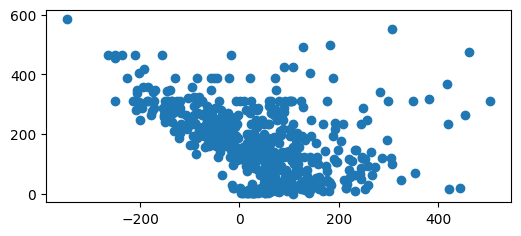

In [103]:
## next plot the residuals from the model

pred_val = LR_model.fittedvalues.copy()
true_val = top500movies_LR1['domestic gross (m)'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [104]:
# Breusch Pagan test 
sms.diagnostic.het_breuschpagan(residual, top500movies_LR1[['budget (m)']])

(132.1939028587149, nan, 172.92378945873256, 1.3707061766598103e-34)

In [105]:
## F-value of 172.92
## p-value is less than 0.5 (stastically significant)
## violated the assumption of homoscedasticity

In [106]:
# Harvey Collier test
sms.linear_harvey_collier(LR_model)

TtestResult(statistic=5.1835341460443685, pvalue=3.0556644619586396e-07, df=554)

In [107]:
## p-value is less than 0.5 (stastically significant)
## violated the assumption of homoscedasticity

(array([ 45.,  56.,  38.,  54.,  93.,  86., 106.,  63.,  13.,   4.]),
 array([-1.65590212,  2.93172015,  7.51934243, 12.1069647 , 16.69458698,
        21.28220925, 25.86983153, 30.4574538 , 35.04507608, 39.63269835,
        44.22032063]),
 <BarContainer object of 10 artists>)

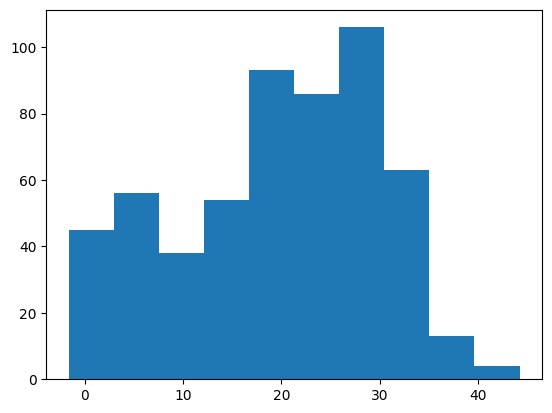

In [108]:
# try Box-Cox transformation
transformed, _ = boxcox(top500movies_LR1['budget (m)'])
plt.hist(transformed)

In [109]:
x = transformed
LRmodel1 = sm.OLS(y,x).fit()
LRmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     domestic gross (m)   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              1822.
Date:                Mon, 08 May 2023   Prob (F-statistic):                   9.82e-178
Time:                        15:50:22   Log-Likelihood:                         -3448.0
No. Observations:                 558   AIC:                                      6898.
Df Residuals:                     557   BIC:                                      6902.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.6116      0.225     42.682      0.000       9.169      10.054
==============================================================================
Omnibus:                      103.446   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.602
Skew:                           1.004   Prob(JB):                     1.25e-48
Kurtosis:                       5.336   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

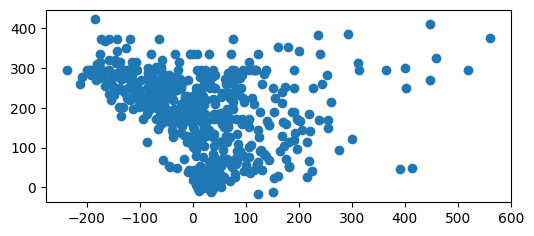

In [110]:
pred_val = LRmodel1.fittedvalues.copy()
true_val = top500movies_LR1['domestic gross (m)'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [111]:
## still violated the assumption of homoscedasticity

In [112]:
## test for multicollinearity

# correlation matrix for domestic gross x budget

top500movies_LR1.corr()

,budget (m),domestic gross (m)
budget (m),1.000000,0.514866
domestic gross (m),0.514866,1.000000


<AxesSubplot: >

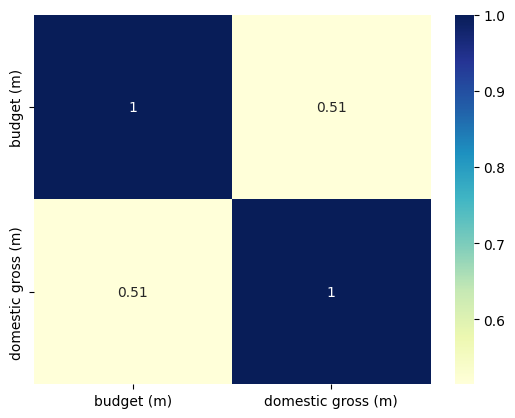

In [113]:
# heatmap for domestic gross x budget
sns.heatmap(top500movies_LR1.corr(), cmap="YlGnBu", annot=True)

In [114]:
# correlation matrix for entire budget/sales dataframe
top500movies_df1.corr()

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_8004\2976238360.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top500movies_df1.corr()


,budget (m),domestic gross (m),international gross (m),worldwide gross (m),x times budget recovered,year
budget (m),1.000000,0.514866,0.155185,0.629408,-0.080470,0.289348
domestic gross (m),0.514866,1.000000,0.363294,0.896879,-0.037752,-0.011435
international gross (m),0.155185,0.363294,1.000000,0.459850,0.049644,0.237822
worldwide gross (m),0.629408,0.896879,0.459850,1.000000,-0.049817,0.110348
x times budget recovered,-0.080470,-0.037752,0.049644,-0.049817,1.000000,-0.012636
year,0.289348,-0.011435,0.237822,0.110348,-0.012636,1.000000


C:\Users\ifranklin\AppData\Local\Temp\ipykernel_8004\20758680.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top500movies_df1.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot: >

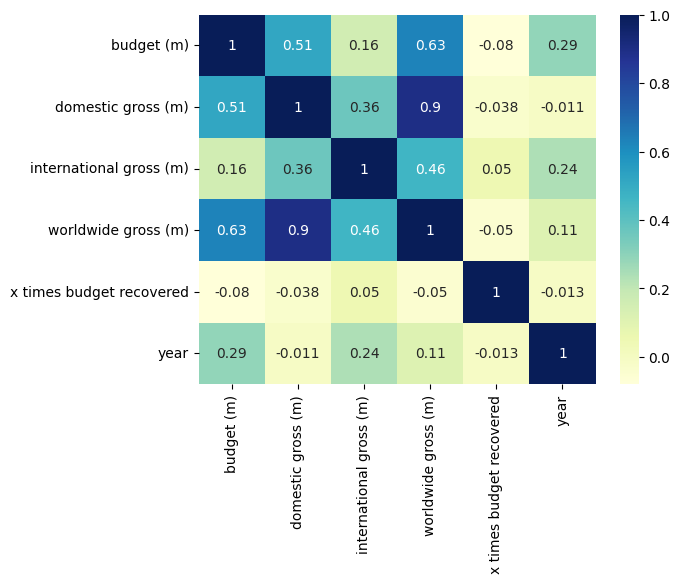

In [115]:
sns.heatmap(top500movies_df1.corr(), cmap="YlGnBu", annot=True)

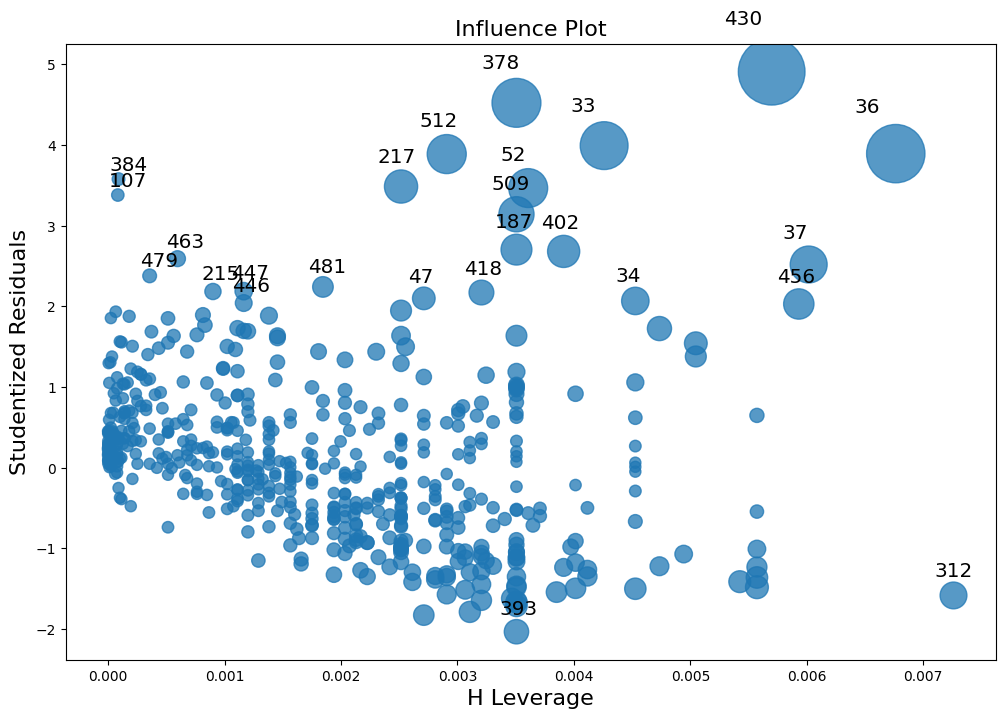

In [116]:
# plot that will test for influential data points
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(LRmodel1, alpha = .05, ax = ax, criterion="cooks")

In [117]:
# DROP OUTLIERS ABOVE X= 0.006 , Y=4!!!!1
## 512, 378, 33, 430, 36, 37, 456, & 312



In [118]:
infl = LRmodel1.get_influence()
print(infl.summary_frame())

       dfb_x1   cooks_d  standard_resid  hat_diag  dffits_internal  \
0    0.015293  0.000234        0.500111  0.000936         0.015304   
1   -0.008407  0.000071       -0.226217  0.001382        -0.008414   
2   -0.065813  0.004330       -1.109188  0.003507        -0.065800   
3   -0.005171  0.000027       -0.166049  0.000970        -0.005175   
4    0.013824  0.000191        0.530608  0.000679         0.013833   
..        ...       ...             ...       ...              ...   
553 -0.050810  0.002582       -0.974540  0.002711        -0.050812   
554 -0.036484  0.001333       -0.598308  0.003709        -0.036505   
555  0.002237  0.000005        0.053464  0.001751         0.002239   
556 -0.041327  0.001707       -1.149201  0.001291        -0.041315   
557  0.039049  0.001526        0.777821  0.002516         0.039063   

     student_resid    dffits  
0         0.499774  0.015293  
1        -0.226024 -0.008407  
2        -1.109418 -0.065813  
3        -0.165904 -0.005171  
4   

In [119]:
## interpreting the regression model
LRmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     domestic gross (m)   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              1822.
Date:                Mon, 08 May 2023   Prob (F-statistic):                   9.82e-178
Time:                        15:50:24   Log-Likelihood:                         -3448.0
No. Observations:                 558   AIC:                                      6898.
Df Residuals:                     557   BIC:                                      6902.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.6116      0.225     42.682      0.000       9.169      10.054
==============================================================================
Omnibus:                      103.446   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.602
Skew:                           1.004   Prob(JB):                     1.25e-48
Kurtosis:                       5.336   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# The overall model is statistically significant, because the p value < .05
# The r-squared value indicates that this model (budget,IV*domestic gross,DV) accounts for 76% of the variance in domestic gross

## Failed Omnibus, Kurtosis, & Jarque-Bera model fit indices!!